In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {'x' : [x for x in range(1, 101)],
'y' : [2*x for x in range(1, 101)]}
df = pd.DataFrame(data)
df

,x,y
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10
...,...,...
95,96,192
96,97,194
97,98,196
98,99,198


In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(df.x.to_numpy().reshape(-1, 1), df.y.to_numpy().reshape(-1, 1), test_size=0.2, random_state=42)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(test_input, test_target)) 

1.0


In [5]:
print(train_input.shape, train_target.shape, test_input.shape, test_target.shape)

(64, 1) (64, 1) (20, 1) (20, 1)


In [6]:
from tensorflow import keras
model = keras.Sequential()
# model.add(keras.layers.Flatten(input_shape=(1,)))
model.add(keras.layers.Dense(50, activation='linear', input_dim=1))
model.add(keras.layers.Dense(50, activation='linear', input_dim=1))
model.add(keras.layers.Dense(1, activation='linear', input_dim=1))

model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                100       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


2023-09-07 15:36:02.512085: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-07 15:36:02.512202: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('quiz_best_model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history= model.fit(train_input, train_target, epochs=300, validation_data=(val_input, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/300


2023-09-07 15:36:02.765391: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-07 15:36:02.914079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 145ms/step - loss: 19211.3711 - mae: 120.7788 - val_loss: 4192.7188 - val_mae: 53.7611
Epoch 2/300
2/2 [==============================] - 0s 41ms/step - loss: 2602.3059 - mae: 39.5292 - val_loss: 341.0506 - val_mae: 15.5575
Epoch 3/300
2/2 [==============================] - 0s 20ms/step - loss: 1417.7401 - mae: 30.5600 - val_loss: 3749.3584 - val_mae: 51.1676
Epoch 4/300
2/2 [==============================] - 0s 21ms/step - loss: 3948.8494 - mae: 55.6501 - val_loss: 2386.4458 - val_mae: 40.8046
Epoch 5/300
1/2 [==============>...............] - ETA: 0s - loss: 2914.5396 - mae: 48.6391

2023-09-07 15:36:03.335493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 42ms/step - loss: 1984.5469 - mae: 38.4858 - val_loss: 288.6388 - val_mae: 14.2142
Epoch 6/300
2/2 [==============================] - 0s 42ms/step - loss: 161.5499 - mae: 8.5246 - val_loss: 136.7935 - val_mae: 9.7138
Epoch 7/300
2/2 [==============================] - 0s 24ms/step - loss: 346.9016 - mae: 15.6282 - val_loss: 839.4343 - val_mae: 24.1234
Epoch 8/300
2/2 [==============================] - 0s 22ms/step - loss: 1062.5347 - mae: 28.7002 - val_loss: 1171.8584 - val_mae: 28.5115
Epoch 9/300
2/2 [==============================] - 0s 22ms/step - loss: 1234.5632 - mae: 31.0972 - val_loss: 913.2584 - val_mae: 25.1708
Epoch 10/300
2/2 [==============================] - 0s 21ms/step - loss: 845.4456 - mae: 25.7031 - val_loss: 396.0716 - val_mae: 16.5741
Epoch 11/300
2/2 [==============================] - 0s 39ms/step - loss: 296.1476 - mae: 15.0640 - val_loss: 41.5801 - val_mae: 5.3640
Epoch 12/300
2/2 [==============================] - 0s 19m

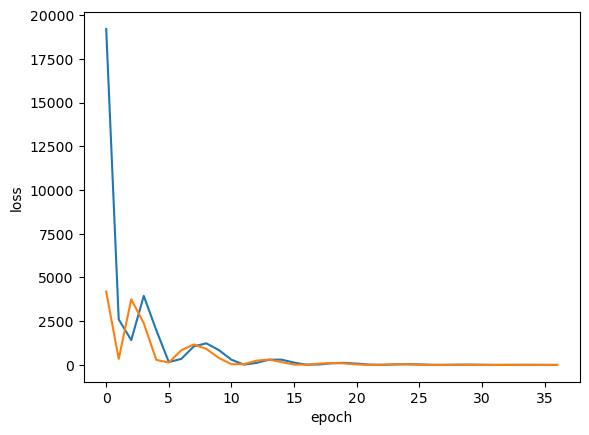

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
model.evaluate(val_input, val_target)

1/1 [==============================] - 0s 15ms/step - loss: 0.1017 - mae: 0.2696


[0.10166710615158081, 0.2695646584033966]

In [10]:
model.evaluate(test_input, test_target)

1/1 [==============================] - 0s 41ms/step - loss: 0.0894 - mae: 0.2579


[0.0894455537199974, 0.25785842537879944]

In [11]:
model.get_weights()

[array([[-0.24447864, -0.06116131,  0.07760308,  0.1058244 ,  0.13377935,
          0.11429464, -0.33826616,  0.09681123,  0.01406321,  0.07558499,
         -0.02636966, -0.06198483, -0.13984056,  0.20162307,  0.02490758,
          0.06657111,  0.11836597, -0.02587634,  0.14877862,  0.01933747,
         -0.01564101, -0.1313488 ,  0.01841879,  0.16899188, -0.00641593,
          0.08570354,  0.09793574,  0.21568939, -0.15899542,  0.0084855 ,
          0.1072368 ,  0.20132138,  0.14205296,  0.15200113,  0.2031724 ,
          0.02262416, -0.17158714,  0.22098494,  0.09738857,  0.02594371,
         -0.04979447,  0.08922298,  0.1647346 ,  0.20353153, -0.06641993,
          0.30317652,  0.2974205 ,  0.09905024,  0.14312279,  0.10371482]],
       dtype=float32),
 array([-0.00908754,  0.09717206,  0.01113401, -0.0873895 ,  0.02057329,
         0.00810648, -0.02819044, -0.04078943, -0.10391293,  0.01675497,
         0.01571672,  0.10615154,  0.09827741, -0.12113885,  0.0672978 ,
         0.02248

In [12]:
model.predict(np.array([[-2]]))[0][0]

2023-09-07 15:36:09.340291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 254ms/step


-4.0036364

In [13]:
# 필요한 라이브러리들 임포트
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 데이터 준비
data = {'x': [x for x in range(1, 101)],
        'y': [2*x for x in range(1, 101)]}
df = pd.DataFrame(data)
X = np.array(df['x']).reshape(-1, 1)
Y = np.array(df['y']).reshape(-1, 1)

# Keras Sequential 모델 구성
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

# 모델 훈련
model.fit(X, Y, epochs=100, batch_size=10)

# 예측 수행
predictions = model.predict(X)

# 몇몇 예측 결과 출력
print(predictions[:5])


Epoch 1/100
 1/10 [==>...........................] - ETA: 1s - loss: 6171.8623

2023-09-07 10:49:10.481063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 3ms/step - loss: 6489.7017
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 5631.0684
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 4809.8564
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 4096.4189
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 3468.9211
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2898.3799
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 2411.0476
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 1987.2306
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 1626.3397
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 1325.8158
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 1058.7111
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 855.2131
Epoch 13/100
1

2023-09-07 10:49:14.054690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
